In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
%cd ..

/content/drive/My Drive/Background_seperation


In [0]:
%cd /content/drive/My Drive/Background_seperation

/content/drive/My Drive/Background_seperation


In [0]:
import os

#Path to the video you want to be processed
inputpath = str('/content/drive/My Drive/Background_seperation/demo_bb2.mp4')
storagepath = str('/content/drive/My Drive/Background_seperation/Frames')
outputpath = str('/content/drive/My Drive/Background_seperation/Frames')

#make a folder for storing all the frames after Instance Segmentation
os.mkdir(storagepath)                                                            
#os.mkdir(outputpath)

# **Installing Detectron**

In [0]:
!pip install -U torch torchvision
import torch, torchvision
torch.__version__
!pip install git+https://github.com/facebookresearch/fvcore.git

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-_uam6ebt
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-_uam6ebt
     |████████████████████████████████| 266kB 8.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=34040 sha256=972ec10b0b491fcc24573eeadbb16754165eabeee68c81b6e3d3fdc034745810
  Stored in directory: /tmp/pip-ephem-wheel-cache-yf0sa0p0/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.2-cp36-cp36m-linux_x86_64.whl size=44209 sha256=29ee6d283e6333a394a566dd08616a5f85608c80fa24072dfcf8ba69562bda35
  Stored in directory: /root/.cache/pip/wheels/54/b7/c7/2ada654ee54483c9329871665aaf4a6056c3ce36f29cf66e67
Successfully built fvcore py

In [0]:
#cloning detetctron repo and executing the setup.py file
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 1866, done.
remote: Total 1866 (delta 0), reused 0 (delta 0), pack-reused 1866
Receiving objects: 100% (1866/1866), 1.71 MiB | 2.78 MiB/s, done.
Resolving deltas: 100% (1186/1186), done.
Checking out files: 100% (380/380), done.
Obtaining file:///content/drive/My%20Drive/Background_seperation/detectron2_repo
     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# **Instance Segmentation and Background Subtraction**

WARNING [12/19 13:21:06 d2.config.compat]: Config './detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
{'instances': Instances(num_instances=2, image_height=480, image_width=854, fields=[pred_boxes = Boxes(tensor([[ 56.2651,   5.5982, 750.1815, 474.6303],
        [136.5193, 269.5092, 152.1620, 317.9101]], device='cuda:0')), scores = tensor([0.9971, 0.6946], device='cuda:0'), pred_classes = tensor([ 0, 39], device='cuda:0'), pred_masks = tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., Fals

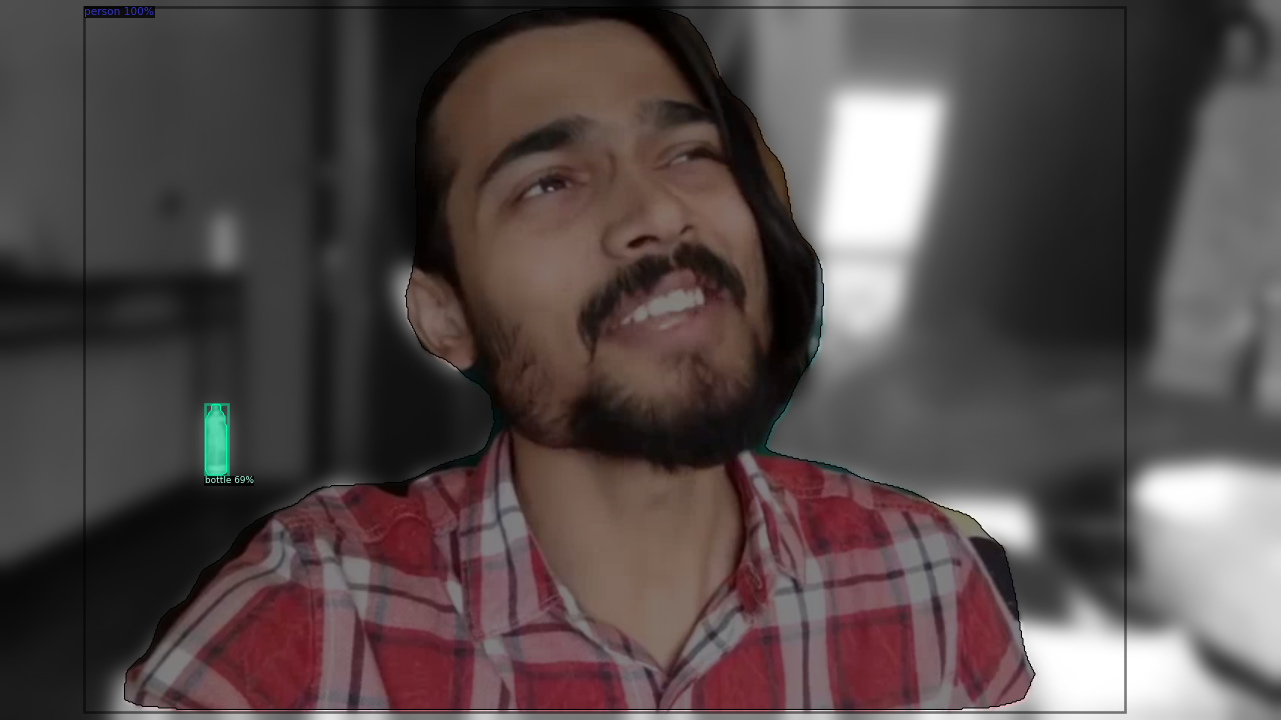

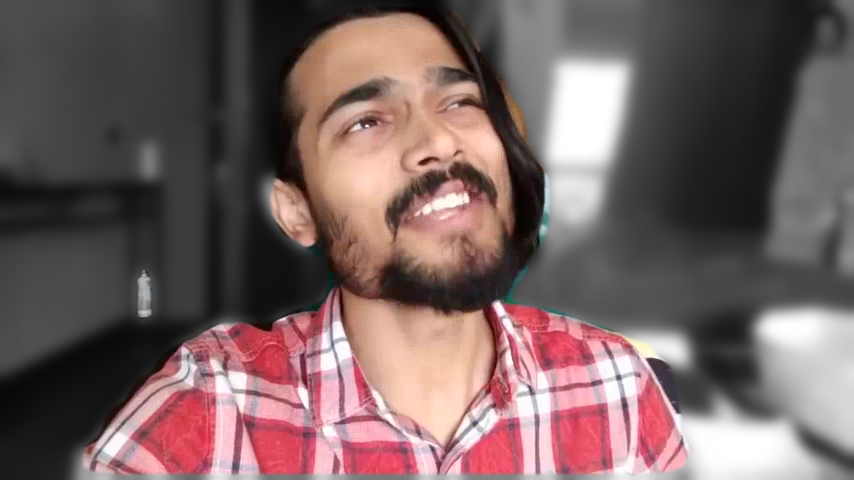

Done


In [68]:
cap = cv2.VideoCapture(inputpath)
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
frame_width = int(cap.get(4))
frame_height = int(cap.get(3))

import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode
from google.colab.patches import cv2_imshow

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
 # set threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)
import numpy as np
i=0

#Video with up to 300 frames gets segmented into each frame
while(i<400):               
  ret, frame = cap.read()
  if ret == True:
    #frame = np.rot90(frame)
    #frame = np.rot90(frame)
    #frame = np.rot90(frame)
    outputs = predictor(frame)
    instances = outputs['instances']

    ####################################################
    #         ---- BACKGROUND SUBTRACTION----          #              
    ####################################################

    #Sum up all the instance mask
    mask = instances.pred_masks.cpu().sum(0) >= 1
    mask = mask.numpy().astype("uint8")*255

    #create 3-channels mask
    mask = np.stack([mask, mask, mask], axis = 2)

    #Apply a slight blur to the mask to soften edges
    mask = cv2.GaussianBlur(mask, (7,7), 0)

    #Take the forground input image
    foreground = frame

    #create a Gaussian blur for the background image
    background = cv2.GaussianBlur(foreground, (41,41), 0)

    #Convert background into gray
    background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

    #Convert single channel gary scale image to 3-channel grayscale image
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2RGB)

    #Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)

    #Normalize the alpha mask to keep intensity between 0 and 1
    mask = mask.astype(float)/255.0

    #Multiply the foreground with the mask
    foreground = cv2.multiply(foreground, mask)

    #Multiply the background with (1 - mask)
    background = cv2.multiply(background, 1.0 - mask)

    #Add the masked foreground and background 
    dst_image = cv2.add(foreground, background)

    ###################################################
    #       ----VISUALIZING THE OUTPUT----            #
    ###################################################

    v = Visualizer(dst_image, MetadataCatalog.get("coco_2017_val"), scale=1.5, instance_mode=ColorMode.IMAGE)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    v = v.get_image()
    #v = cv2.cvtColor(v.get_image(), cv2.COLOR_RGB2BGR)

    #Storing the out file to frame dir
    cv2.imwrite(storagepath + '/result_%04i.jpg' %i, dst_image)
    i+=1
    if i == 3:
      print(outputs)
      print("Processing the video! Here is a frame:")
      cv2_imshow(v)
      cv2_imshow(dst_image)
    
  # Break the loop
  else:
    break 
 
# When everything done, release the video capture and video write objects
cap.release()
# Closes all the frames
cv2.destroyAllWindows()
print('Done')

In [0]:
# look at the outputs
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

In [0]:
#Run this if you want to delete the instance segmented images
from shutil import rmtree
rmtree(storagepath)

# **Exporting the Video File**

In [0]:
pathIn= outputpath
#Store the final video
pathOut = '/content/drive/My Drive/Background_seperation/final_bb_output_2.mp4'
fps = 25 #change as you wish

import cv2
import numpy as np
import os
from os.path import isfile, join
import glob

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
for frame in glob.iglob(pathIn + '/*.jpg'):
    #reading each files
    img = cv2.imread(frame)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()